
#**<font face="Georgia" color="Purple">DIAMOND PRICE PREDICTION: REGRESSION ANALYSIS</font>**
---

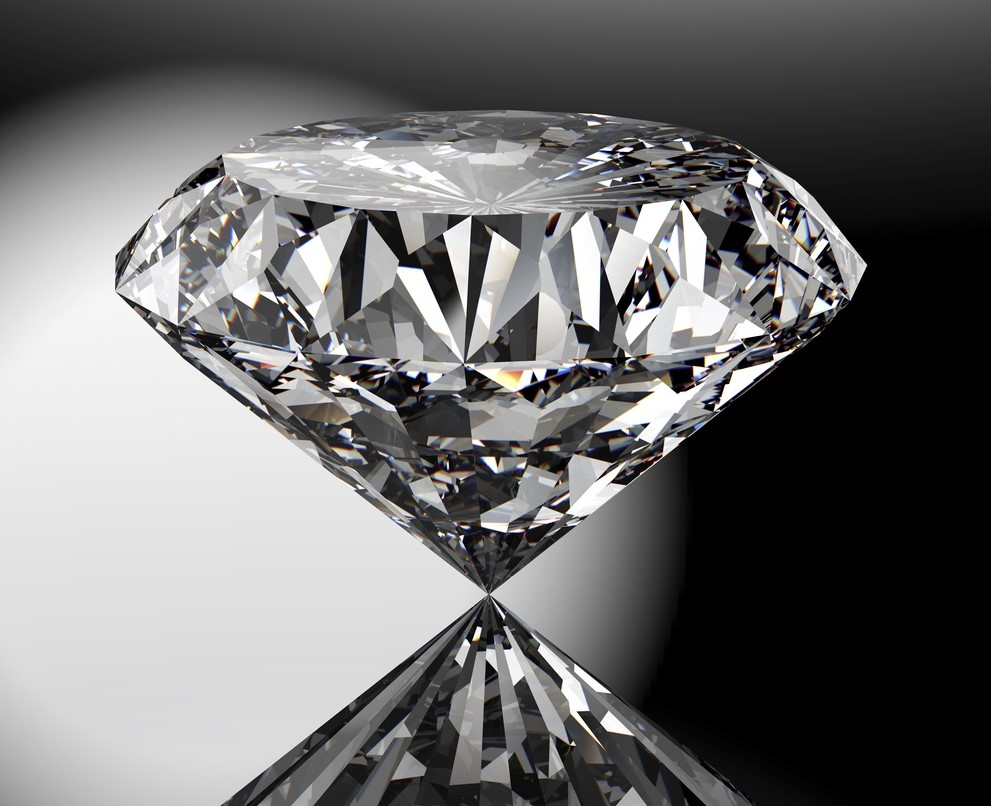

## **OBJECTIVE**

---


The objective of this project is to develop a predictive model that accurately estimates the price of diamonds based on various characteristics. By analyzing a dataset containing different attributes of diamonds, such as carat weight, cut, color, clarity, and other physical measurements, the model aims to identify patterns and relationships that determine the pricing. This predictive tool can be beneficial for buyers, sellers, and jewelers in making informed pricing decisions.

## **DATA DESCRIPTION**

---

The dataset consists of 219,703 records, each representing a diamond with the following attributes:

1.   `cut`: cut refers to one of the 10 or so most common diamond cuts. This dataset has an additional one called the 'Cushion Modified'.
2.   `color` : The color grading of the diamond.Clear diamonds are graded D-Z. The higher letters more yellowish but are often better values since color is hard to determine once in a ring.

3. `clarity` : clarity refers the inclusions (i.e., internal flaws) in the diamonds seen though a jewelers loupe or microscope. Fewer and smaller are better.

4.  `carat_weight` : The weight of the diamond in carats.

5. `cut_quality` : Quality of the cut (e.g., Excellent, Good).

6. `lab` : The laboratory that certified the diamond.

7. `symmetry` : The symmetry grade of the diamond

8. `polish` : The polish grade of the diamond.

9. `eye_clean`: Whether the diamond appears clean to the naked eye.

10. `culet_size` : The size of the culet (bottom facet) of the diamond.

11. `culet_condition` : The condition of the culet. It indicates if the culet has any chipping, which is why some diamonds don't close to a point but rather a very small flat spot.

12. `depth_percent` : The total depth percentage of the diamond.

13. `table_percent` : The width of the table expressed as a percentage of its average diameter.
14. `meas_length` : Length measurement of the diamond in millimeters.
15. `meas_width` : Width measurement of the diamond in millimeters.
16. `meas_depth` : Depth measurement of the diamond in millimeters.
17. `girdle_min` : Minimum thickness of the girdle.
18. `girdle_max` : Maximum thickness of the girdle.
19. `fluor_color` : The color of fluorescence in the diamond.
20. `fluor_intensity` : The intensity of fluorescence.
21. `fancy_color_dominant_color` : Dominant color for fancy colored diamonds.
22. `fancy_color_secondary_color` : Secondary color for fancy colored diamonds.
23. `fancy_color_overtone` : Overtone color for fancy colored diamonds.
24. `fancy_color_intensity` : Intensity of fancy color.
15. `total_sales_price` : The total sales price of the diamond.




# **Steps Involved in the Project**

1. Project Initiation and Planning
2. Data Collection
3. Data Preprocessing
4. Exploratory Data Analysis (EDA)
5. Feature Engineering
6. Model Selection
7. Model Training
8. Model Evaluation


## **IMPORTING LIBRARIES**

---



In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.feature_selection import mutual_info_regression
import warnings
warnings.filterwarnings('ignore')

## **IMPORTING DATASET**

---



In [168]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/diamonds.csv')
df

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,...,8.66,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,5.71,TK,XTK,unknown,NaN,Green,unknown,NaN,Fancy Light,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,...,10.20,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,...,3.47,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy,1350000


In [169]:
#view 5 rows from data from header
df.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


In [170]:
#view 5 rows from data from tail
df.tail()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,...,8.66,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,5.71,TK,XTK,unknown,NaN,Green,unknown,NaN,Fancy Light,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,...,10.20,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,...,3.47,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy,1350000
219702,219703,Pear,unknown,VVS2,10.03,unknown,GIA,Very Good,Excellent,unknown,...,7.39,unknown,unknown,unknown,NaN,Yellow,unknown,unknown,Fancy Vivid,1449881


In [171]:
# the dimension of the data set
print(f'The Dataframe has {df.shape[0]} rows and {df.shape[1]} columns')

The Dataframe has 219703 rows and 26 columns


In [172]:
#check data type for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219703 entries, 0 to 219702
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   219703 non-null  int64  
 1   cut                          219703 non-null  object 
 2   color                        219703 non-null  object 
 3   clarity                      219703 non-null  object 
 4   carat_weight                 219703 non-null  float64
 5   cut_quality                  219703 non-null  object 
 6   lab                          219703 non-null  object 
 7   symmetry                     219703 non-null  object 
 8   polish                       219703 non-null  object 
 9   eye_clean                    219703 non-null  object 
 10  culet_size                   219703 non-null  object 
 11  culet_condition              219703 non-null  object 
 12  depth_percent                219703 non-null  float64
 13 

##**Descriptive Statistics**

---

Descriptive statistics summarize and organize characteristics of a data set.It uses quantitative tools like mean, variance, range, etc., to describe the features of data


In [173]:
# Descriptive statistics for numerical features
df.describe().T.style.background_gradient(cmap = 'inferno')

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,219703.000000,109851.747418,63423.264419,0.000000,54925.500000,109852.000000,164777.500000,219703.000000
carat_weight,219703.000000,0.755176,0.845894,0.080000,0.310000,0.500000,1.000000,19.350000
depth_percent,219703.000000,61.683768,9.915266,0.000000,61.200000,62.400000,63.500000,98.700000
table_percent,219703.000000,57.747585,9.959928,0.000000,57.000000,58.000000,60.000000,94.000000
meas_length,219703.000000,5.548853,1.763924,0.000000,4.350000,5.060000,6.350000,93.660000
meas_width,219703.000000,5.135626,1.374529,0.000000,4.310000,4.800000,5.700000,62.300000
meas_depth,219703.000000,3.285699,2.054822,0.000000,2.680000,3.030000,3.630000,76.300000
total_sales_price,219703.000000,6908.062207,25959.494283,200.000000,958.000000,1970.000000,5207.000000,1449881.000000


In [174]:
# Descriptive statistics for Categorical features
df.describe(include=['O']).T

,count,unique,top,freq
cut,219703,11,Round,158316
color,219703,11,E,33103
clarity,219703,11,SI1,38627
cut_quality,219703,6,Excellent,124861
lab,219703,3,GIA,200434
symmetry,219703,5,Excellent,131619
polish,219703,5,Excellent,175806
eye_clean,219703,5,unknown,156916
culet_size,219703,9,N,131899
culet_condition,219703,4,unknown,204384


## **DATA PREPROCESSING**

---



In [175]:
# To check missing values
df.isna().sum()

,0
Unnamed: 0,0
cut,0
color,0
clarity,0
carat_weight,0
cut_quality,0
lab,0
symmetry,0
polish,0
eye_clean,0


In [176]:
df.drop(['Unnamed: 0','fluor_intensity','fancy_color_overtone'],axis=1,inplace=True)

In [177]:
# to see unique values of categorical columns
for i in df.columns:
  if df[i].dtype=='object':
    print(df[i].unique(),'\n')

['Round' 'Pear' 'Oval' 'Marquise' 'Princess' 'Emerald' 'Heart' 'Cushion'
 'Radiant' 'Cushion Modified' 'Asscher'] 

['E' 'F' 'L' 'D' 'J' 'I' 'G' 'H' 'M' 'K' 'unknown'] 

['VVS2' 'VVS1' 'I1' 'VS1' 'VS2' 'IF' 'SI2' 'I2' 'SI1' 'SI3' 'I3'] 

['Excellent' 'Very Good' 'unknown' 'Good' 'Fair' 'Ideal'] 

['IGI' 'GIA' 'HRD'] 

['Very Good' 'Excellent' 'Good' 'Fair' 'Poor'] 

['Very Good' 'Excellent' 'Good' 'Fair' 'Poor'] 

['unknown' 'Yes' 'E1' 'Borderline' 'No'] 

['N' 'unknown' 'S' 'M' 'VS' 'L' 'EL' 'SL' 'VL'] 

['unknown' 'Abraded' 'Chipped' 'Pointed'] 

['M' 'STK' 'TN' 'TK' 'unknown' 'VTN' 'VTK' 'XTK' 'XTN' 'STN'] 

['M' 'STK' 'TK' 'unknown' 'TN' 'VTK' 'XTK' 'XTN' 'VTN' 'STN'] 

['unknown' 'Blue' 'Yellow' 'Green' 'White' 'Orange'] 

['unknown' 'Orange' 'Brown' 'Yellow' 'Pink' 'Black' 'Other' 'Gray'
 'Purple' 'Blue' 'Green' 'Chameleon' 'Red'] 

['unknown' 'Purple' 'Green' 'Yellow' 'Brown' 'Orange' 'Pink' 'Gray' 'Blue'
 'Violet' 'Red'] 

['unknown' 'Fancy' 'Very Light' 'Faint' 'Fancy Light' '

In [178]:
df.replace('unknown',np.NaN,inplace=True)

In [179]:
df.drop(['eye_clean','culet_condition','fluor_color','fancy_color_dominant_color','fancy_color_secondary_color','fancy_color_intensity'],axis=1,inplace=True)

In [180]:
df.replace(0,np.NaN,inplace=True)

In [181]:
# Detecting duplicate rows
df.duplicated().sum()

4099

In [182]:
# Dropping duplicate rows
df.drop_duplicates(inplace=True)

In [183]:
# Removing missing values
df.dropna(inplace=True)

In [184]:
df.reset_index(drop=True,inplace=True)

In [185]:
df.shape

(85060, 17)

In [186]:
df.columns

Index(['cut', 'color', 'clarity', 'carat_weight', 'cut_quality', 'lab',
       'symmetry', 'polish', 'culet_size', 'depth_percent', 'table_percent',
       'meas_length', 'meas_width', 'meas_depth', 'girdle_min', 'girdle_max',
       'total_sales_price'],
      dtype='object')

In [187]:
#Simplifying Clarity Categories
clarity_mapping = {
    'IF': 'High Clarity',
    'VVS1': 'High Clarity',
    'VVS2': 'High Clarity',
    'VS1': 'Moderate Clarity',
    'VS2': 'Moderate Clarity',
    'SI1': 'Noticeable Clarity',
    'SI2': 'Noticeable Clarity',
    'I1': 'Low Clarity',
    'I2': 'Low Clarity',
    'I3': 'Low Clarity'
}
df['clarity'] = df['clarity'].replace(clarity_mapping)
df

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,Round,E,High Clarity,0.09,Excellent,IGI,Very Good,Very Good,N,62.7,59.0,2.85,2.87,1.79,M,M,200
1,Round,E,High Clarity,0.09,Very Good,IGI,Very Good,Very Good,N,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,Round,E,High Clarity,0.09,Very Good,IGI,Very Good,Excellent,N,64.9,58.5,2.79,2.83,1.82,STK,STK,200
3,Round,E,High Clarity,0.09,Very Good,IGI,Very Good,Very Good,N,60.8,57.0,2.95,2.99,1.81,TN,M,200
4,Round,E,High Clarity,0.09,Excellent,IGI,Very Good,Very Good,N,62.1,59.5,2.86,2.89,1.78,M,M,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85055,Round,D,High Clarity,10.66,Excellent,GIA,Excellent,Excellent,N,59.4,59.0,14.30,14.38,8.52,TN,M,1027011
85056,Round,F,High Clarity,10.66,Excellent,GIA,Excellent,Excellent,N,61.4,58.0,14.14,14.16,8.69,M,STK,1034844
85057,Round,D,High Clarity,10.10,Excellent,GIA,Excellent,Excellent,N,59.4,59.0,14.07,14.15,8.39,M,STK,1040739
85058,Round,E,Moderate Clarity,10.65,Excellent,GIA,Excellent,Excellent,N,61.3,58.0,14.06,14.18,8.66,M,STK,1210692


In [188]:
df=df[df['cut_quality']!='Good']

In [189]:
# replace the values in the columns'girdle_min','girdle_min'
class_mapping= {
    'TN': 'Thin',
    'VTN': 'Thin',
    'M': 'Medium',
    'TK': 'Thick',
    'VTK': 'Thick',
    'STK': 'Thick',
    'STN': 'Thin',
    'XTN': 'Thin'
}
class_mapping1= {
    'TN': 'Thin',
    'VTN': 'Thin',
    'M': 'Medium',
    'TK': 'Thick',
    'VTK': 'Thick',
    'STK': 'Thick',
    'STN': 'Thin',
    'XTN': 'Thin',
    'XTK':'Thick'
}
df['girdle_min'] = df['girdle_min'].replace(class_mapping)
df['girdle_max'] = df['girdle_max'].replace(class_mapping1)

In [190]:
#Checking value_counts for columns
for i in df.columns:
  if df[i].dtype=='object':
    print(df[i].value_counts(),'\n')

cut
Round       84848
Emerald        56
Pear           46
Oval           38
Princess       31
Heart          16
Marquise       13
Radiant         7
Cushion         4
Name: count, dtype: int64 

color
E    13477
F    12955
D    12850
G    11262
H     9849
I     8936
J     6930
K     4904
L     2587
M     1309
Name: count, dtype: int64 

clarity
High Clarity          29900
Moderate Clarity      27874
Noticeable Clarity    24070
Low Clarity            3215
Name: count, dtype: int64 

cut_quality
Excellent    68166
Very Good    16893
Name: count, dtype: int64 

lab
GIA    83144
IGI     1805
HRD      110
Name: count, dtype: int64 

symmetry
Excellent    65015
Very Good    20044
Name: count, dtype: int64 

polish
Excellent    73150
Very Good    11909
Name: count, dtype: int64 

culet_size
N     83901
VS      879
S       217
M        35
L        27
Name: count, dtype: int64 

girdle_min
Medium    57369
Thick     14489
Thin      13201
Name: count, dtype: int64 

girdle_max
Thick     72225
Medi

## **CORRELATION BETWEEN INPUT AND OUTPUT**

---



## **Heatmap**


 Graphical representation that visually displays the correlation matrix of features in a dataset. It is used to identify highly correlated features, which can then be considered for removal or further analysis during the feature selection process.

<Axes: >

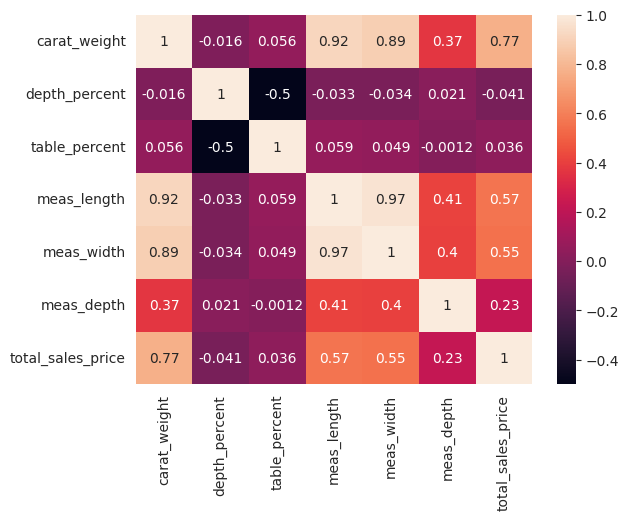

In [191]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

## **TARGET VARIABLE EXPLORATION**

---



In [109]:
# Sorting the total sales price according to the carat weight in decending order.
top_price_by_carat_weight=df[['carat_weight','total_sales_price']].sort_values(by='total_sales_price',ascending=False)[:10] # Sorting top 10 values
top_price_by_carat_weight

,carat_weight,total_sales_price
85059,18.07,1315496
85058,10.65,1210692
85057,10.10,1040739
85056,10.66,1034844
85055,10.66,1027011
85054,18.13,964516
85053,10.27,954700
85052,10.46,878642
85051,10.23,859320
85050,10.14,851760


In [110]:
# Sorting the total sales price according to the meas length in decending order.
top_price_by_meas_length=df[['meas_length','total_sales_price']].sort_values(by='total_sales_price',ascending=False)[:10] # Sorting top 10 values
top_price_by_meas_length

,meas_length,total_sales_price
85059,17.06,1315496
85058,14.06,1210692
85057,14.07,1040739
85056,14.14,1034844
85055,14.30,1027011
85054,16.81,964516
85053,13.88,954700
85052,13.95,878642
85051,13.82,859320
85050,13.84,851760


In [111]:
#Sorting the total sales price according to the meas width in decending order.
top_price_by_meas_width=df[['meas_width','total_sales_price']].sort_values(by='total_sales_price',ascending=False)[:10] # Sorting top 10 values
top_price_by_meas_width

,meas_width,total_sales_price
85059,17.10,1315496
85058,14.18,1210692
85057,14.15,1040739
85056,14.16,1034844
85055,14.38,1027011
85054,16.85,964516
85053,13.90,954700
85052,14.06,878642
85051,13.92,859320
85050,13.88,851760


In [112]:
#Sorting the total sales price according to the meas depth in decending order.
top_price_by_meas_depth=df[['meas_depth','total_sales_price']].sort_values(by='total_sales_price',ascending=False)[:10] # Sorting top 10 values
top_price_by_meas_depth

,meas_depth,total_sales_price
85059,10.20,1315496
85058,8.66,1210692
85057,8.39,1040739
85056,8.69,1034844
85055,8.52,1027011
85054,10.38,964516
85053,8.63,954700
85052,8.71,878642
85051,8.69,859320
85050,8.56,851760


In [113]:
#Sorting the total sales price according to the color in decending order.
top_price_by_color=df[['color','total_sales_price']].sort_values(by='total_sales_price',ascending=False)[:10] # Sorting top 10 values
top_price_by_color

,color,total_sales_price
85059,E,1315496
85058,E,1210692
85057,D,1040739
85056,F,1034844
85055,D,1027011
85054,H,964516
85053,G,954700
85052,G,878642
85051,G,859320
85050,G,851760


In [114]:
#Sorting the total sales price according to the clarity in decending order.
top_price_by_clarity=df[['clarity','total_sales_price']].sort_values(by='total_sales_price',ascending=False)[:10] # Sorting top 10 values
top_price_by_clarity

,clarity,total_sales_price
85059,Moderate Clarity,1315496
85058,Moderate Clarity,1210692
85057,High Clarity,1040739
85056,High Clarity,1034844
85055,High Clarity,1027011
85054,Moderate Clarity,964516
85053,High Clarity,954700
85052,Moderate Clarity,878642
85051,Moderate Clarity,859320
85050,Moderate Clarity,851760


In [115]:
#Sorting the total sales price according to the cut_quality in decending order.
top_price_by_cut_quality=df[['cut_quality','total_sales_price']].sort_values(by='total_sales_price',ascending=False)[:10] # Sorting top 10 values
top_price_by_cut_quality

,cut_quality,total_sales_price
85059,Excellent,1315496
85058,Excellent,1210692
85057,Excellent,1040739
85056,Excellent,1034844
85055,Excellent,1027011
85054,Excellent,964516
85053,Excellent,954700
85052,Excellent,878642
85051,Excellent,859320
85050,Excellent,851760


In [116]:
#Sorting the total sales price according to the in decending depth_percent order.
top_price_by_depth_percent=df[['depth_percent','total_sales_price']].sort_values(by='total_sales_price',ascending=False)[:10] # Sorting top 10 values
top_price_by_depth_percent

,depth_percent,total_sales_price
85059,60.2,1315496
85058,61.3,1210692
85057,59.4,1040739
85056,61.4,1034844
85055,59.4,1027011
85054,61.6,964516
85053,62.1,954700
85052,62.2,878642
85051,62.7,859320
85050,61.8,851760


## **EXPLORATORY DATA ANALYSIS**

---



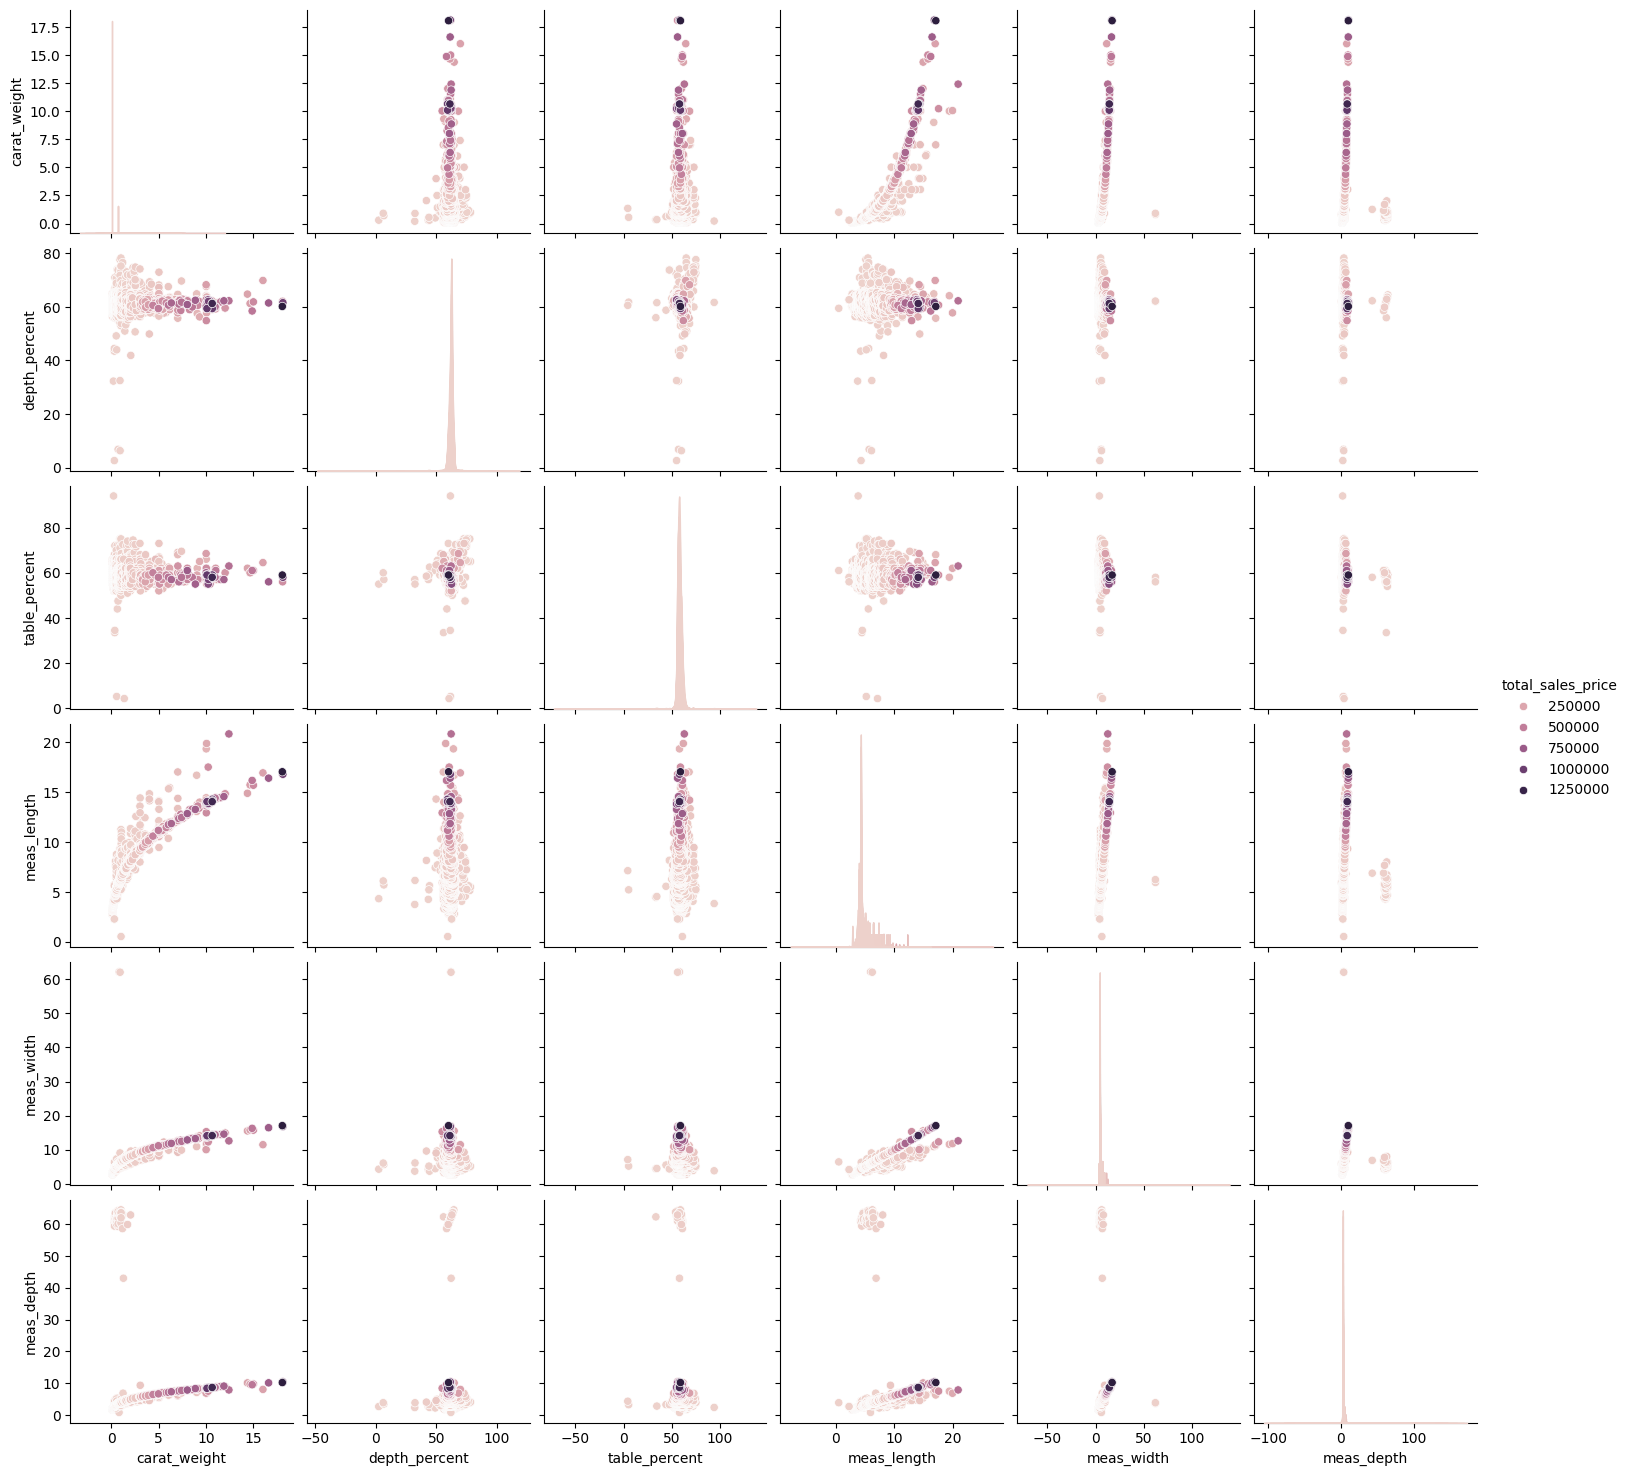

In [117]:
sns.pairplot(df,hue='total_sales_price')

<Axes: xlabel='total_sales_price'>

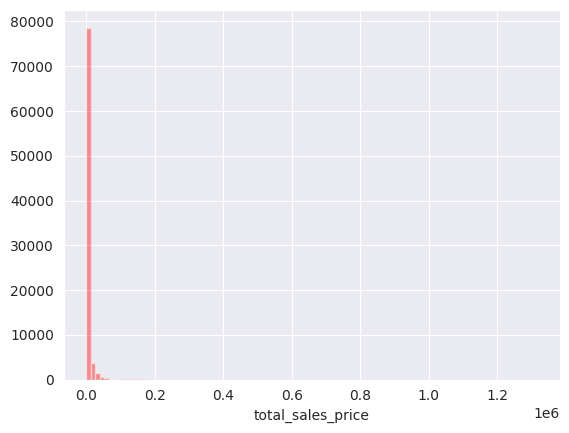

In [118]:
# set the background style of the plot
sns.set_style('darkgrid')

# Plotting Distribution plot for total_sales_price
sns.distplot(df['total_sales_price'], kde = False, color ='red', bins = 100)

In [119]:
df_y = df['total_sales_price']

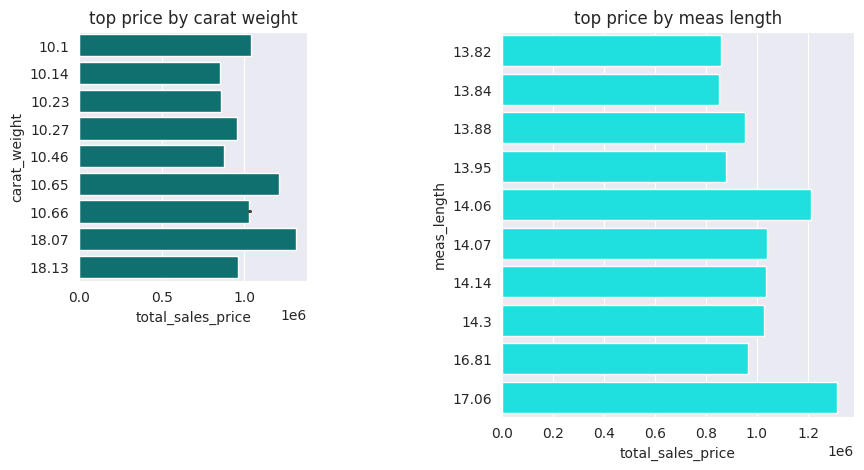

In [120]:
# Plotting Bar graphs for total_sales_price vs carat_weight and total_sales_price vs meas_length
plt.figure(figsize=(10,11))
plt.subplot(3, 3, 1)
sns.barplot(top_price_by_carat_weight,x=df_y,y='carat_weight',color='teal',orient='h')
plt.title('top price by carat weight')
plt.subplot(2,2,2)
sns.barplot(top_price_by_meas_length,x=df_y,y='meas_length',color='cyan',orient='h')
plt.title('top price by meas length')
plt.show()

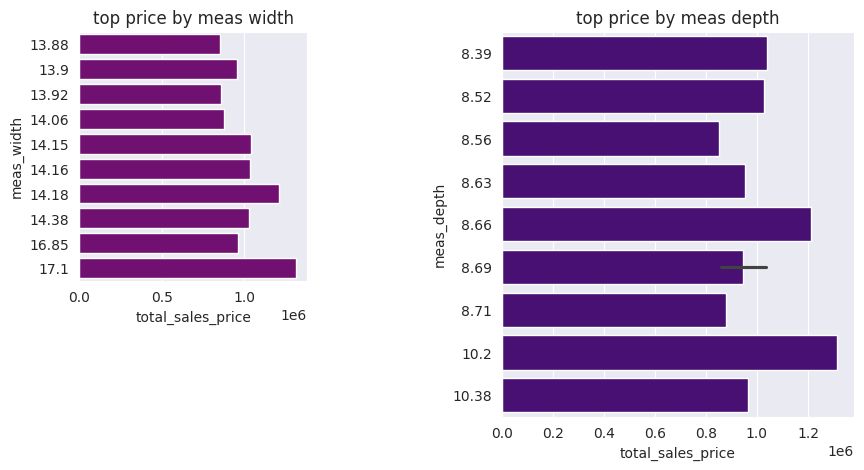

In [121]:
plt.figure(figsize=(10,11))
plt.subplot(3, 3, 1)
sns.barplot(top_price_by_meas_width,x=df_y,y='meas_width',color='purple',orient='h')
plt.title('top price by meas width')
plt.subplot(2,2,2)
sns.barplot(top_price_by_meas_depth,x=df_y,y='meas_depth',color='indigo',orient='h')
plt.title('top price by meas depth')
plt.show()

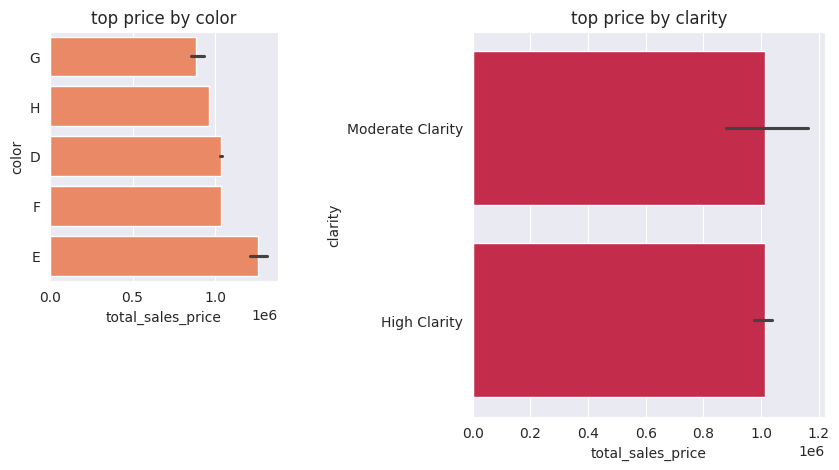

In [122]:
plt.figure(figsize=(10,11))
plt.subplot(3, 3, 1)
sns.barplot(top_price_by_color,x=df_y,y='color',color='coral',orient='h')
plt.title('top price by color')
plt.subplot(2,2,2)
sns.barplot(top_price_by_clarity,x=df_y,y='clarity',color='crimson',orient='h')
plt.title('top price by clarity')
plt.show()

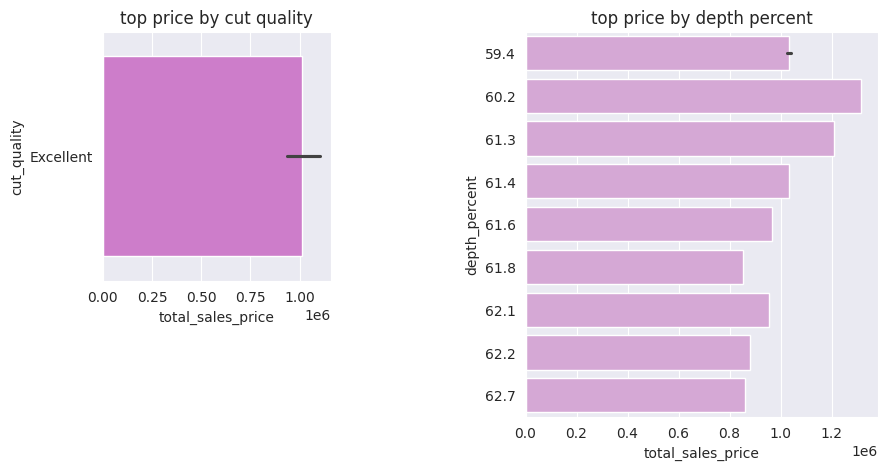

In [123]:
plt.figure(figsize=(10,11))
plt.subplot(3, 3, 1)
sns.barplot(top_price_by_cut_quality,x=df_y,y='cut_quality',color='orchid',orient='h')
plt.title('top price by cut quality')
plt.subplot(2,2,2)
sns.barplot(top_price_by_depth_percent,x=df_y,y='depth_percent',color='plum',orient='h')
plt.title('top price by depth percent')
plt.show()

In [124]:
numerical_cols=['carat_weight','depth_percent','table_percent','meas_length','meas_width','meas_depth']

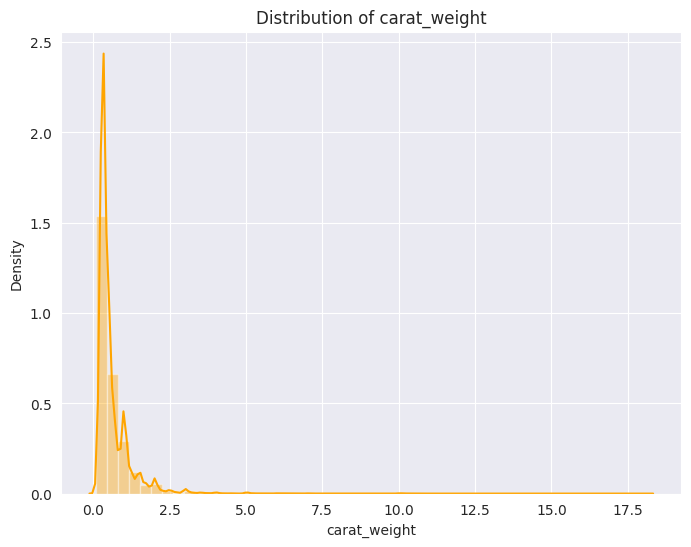

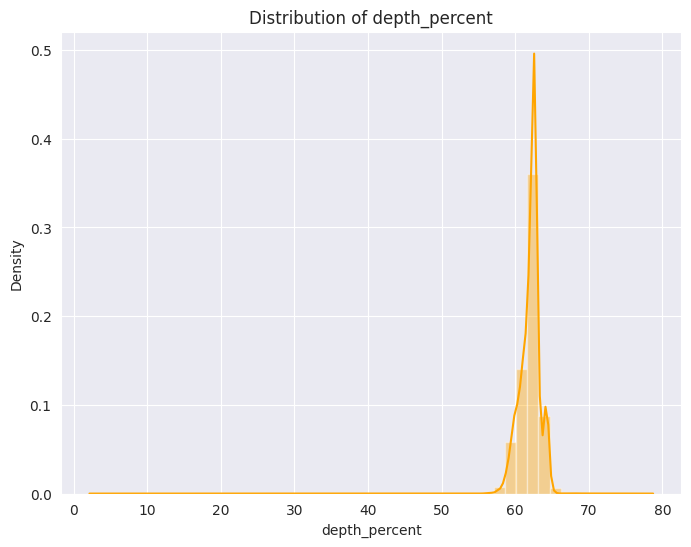

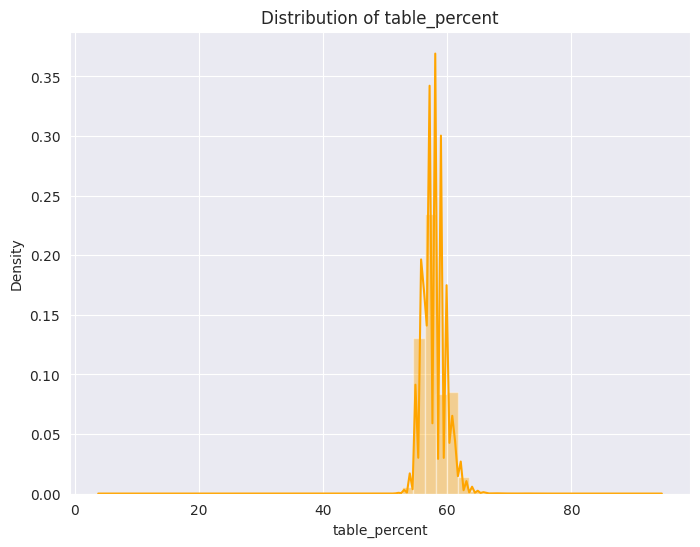

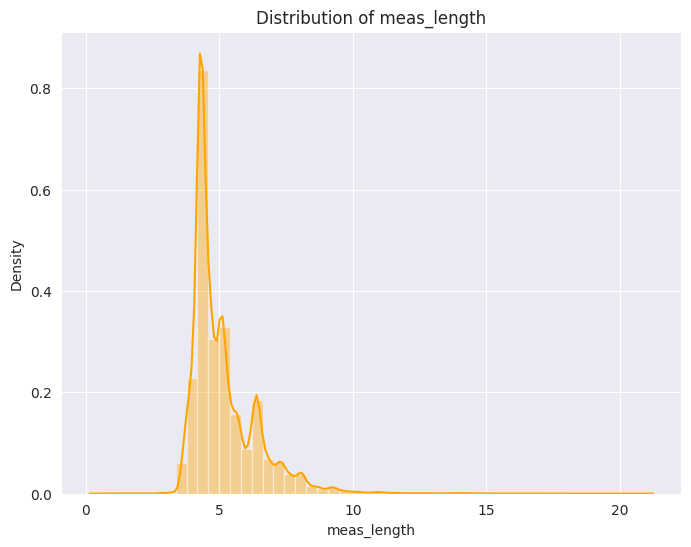

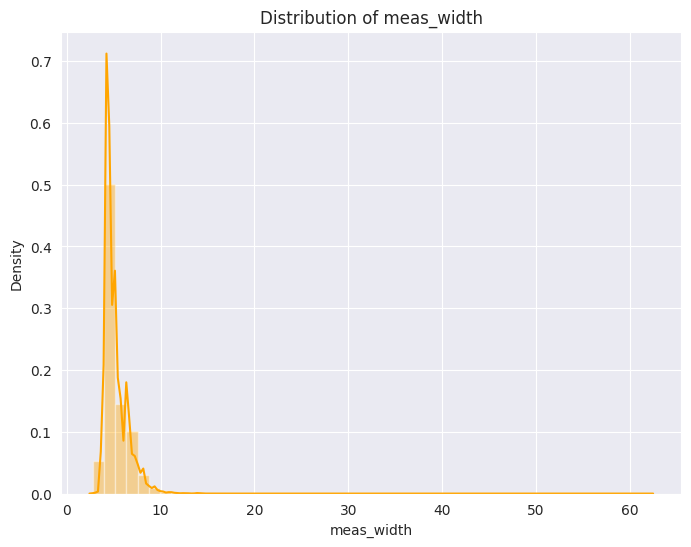

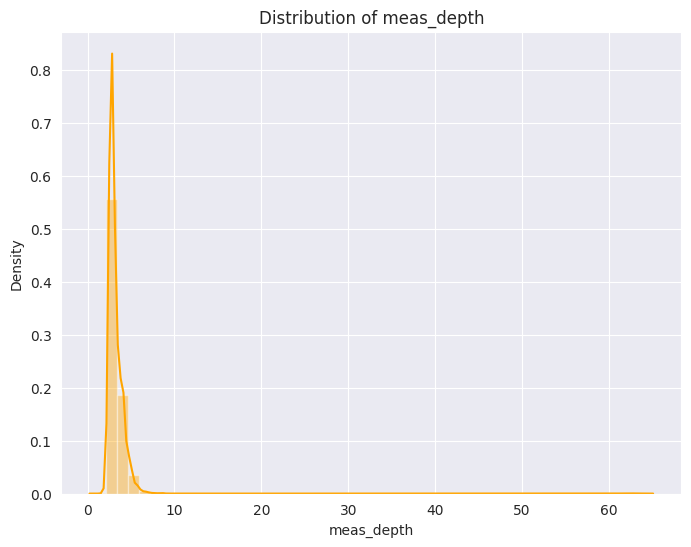

In [192]:
# Plotting Distribution plots for numerical columns
for col in numerical_cols:
  plt.figure(figsize=(8,6))
  sns.distplot(df[col],kde=True,color='orange')
  plt.title(f'Distribution of {col}')
  plt.show()


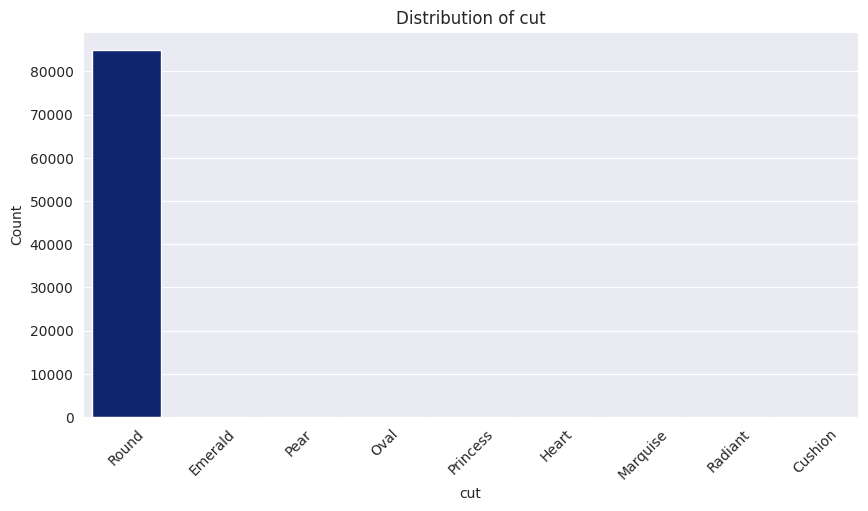

In [126]:
#visualizing countplot for all categorical columns
def plot_categorical_columns(df, columns):
    for column in columns:
        plt.figure(figsize=(10, 5))
        sns.countplot(data=df, x=column, order=df[column].value_counts().index,palette='dark')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()
plot_categorical_columns(df,['cut'])

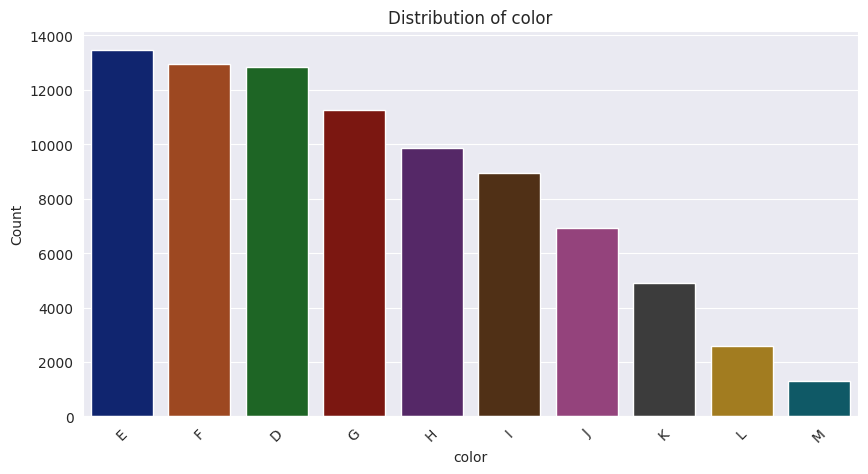

In [127]:
plot_categorical_columns(df,['color'])

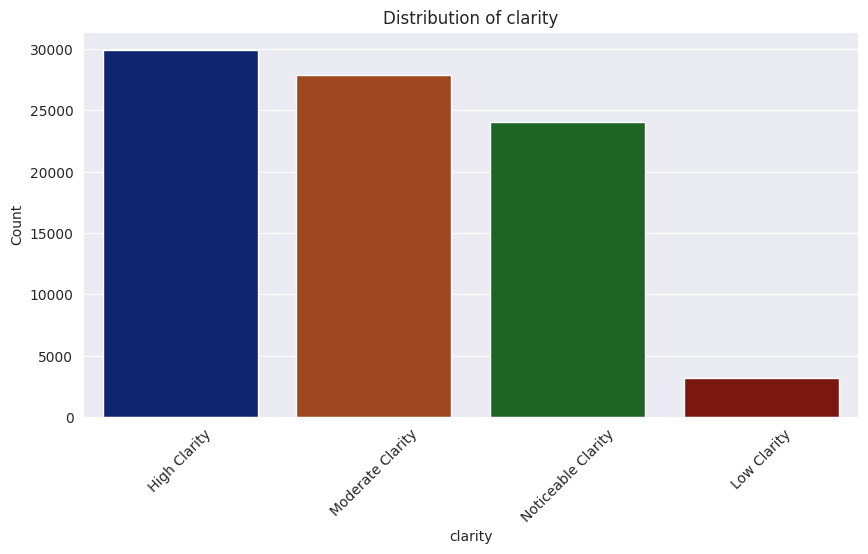

In [128]:
plot_categorical_columns(df,['clarity'])

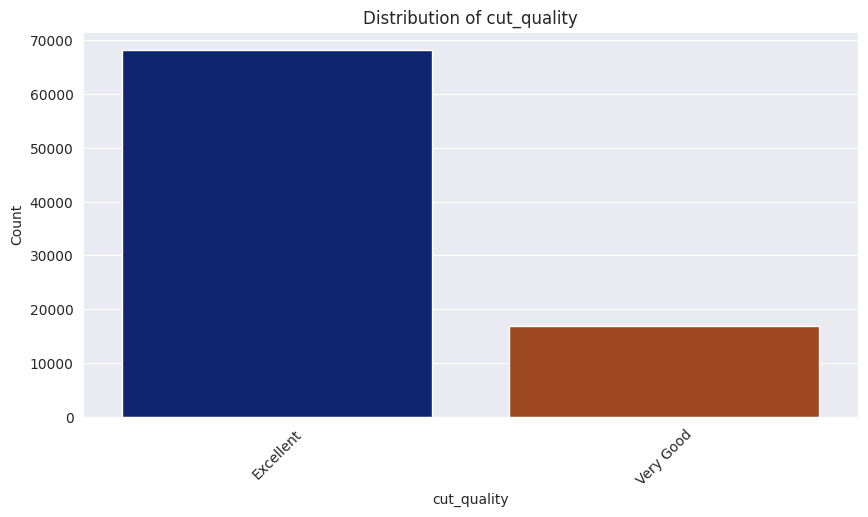

In [129]:
plot_categorical_columns(df,['cut_quality'])

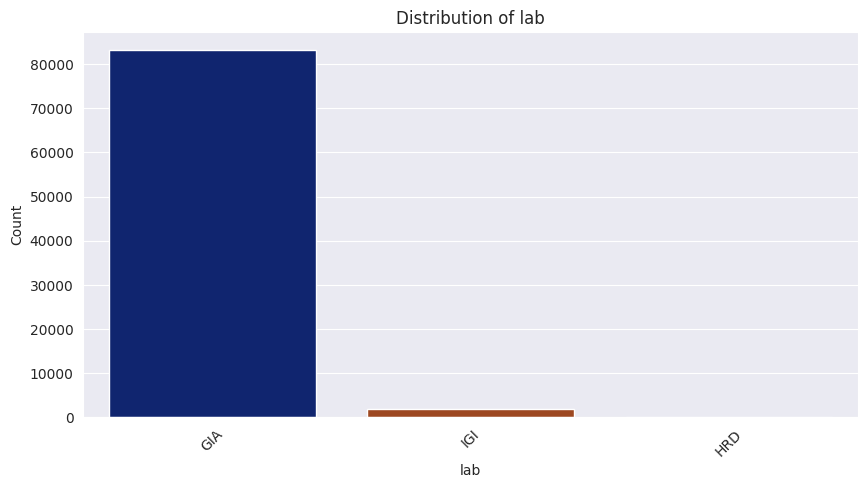

In [130]:
plot_categorical_columns(df,['lab'])

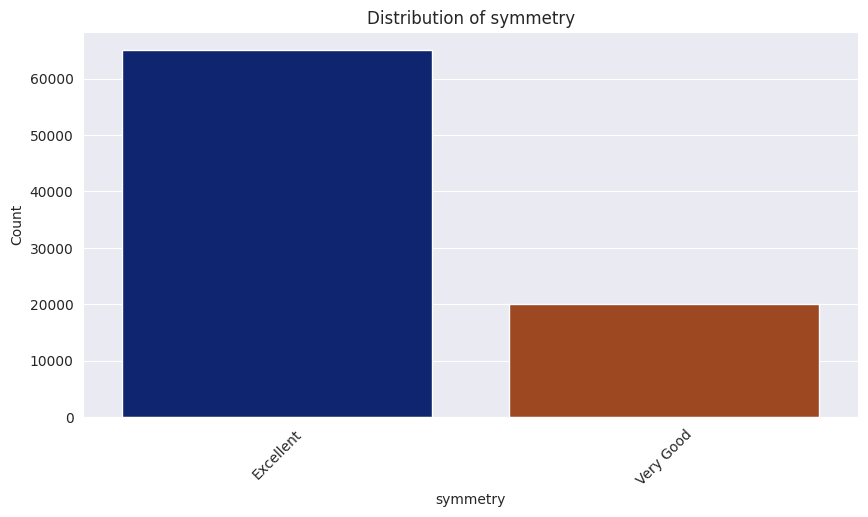

In [131]:
plot_categorical_columns(df,['symmetry'])

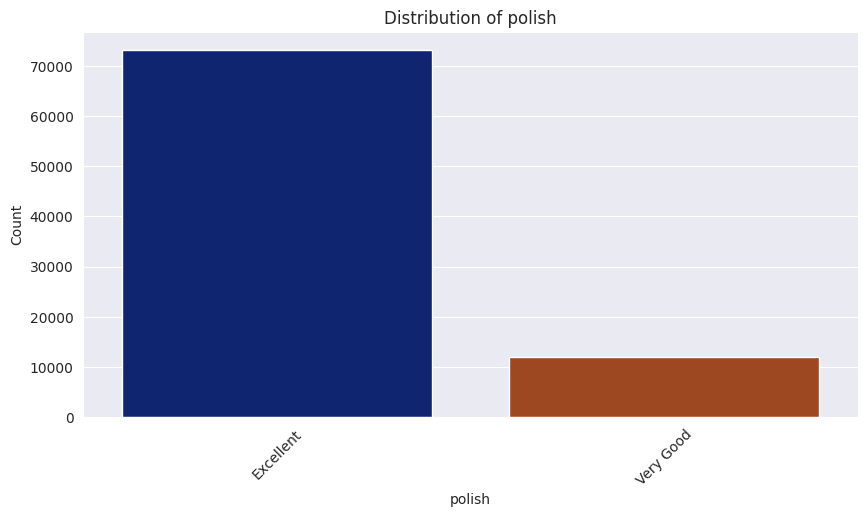

In [133]:
plot_categorical_columns(df,['polish'])

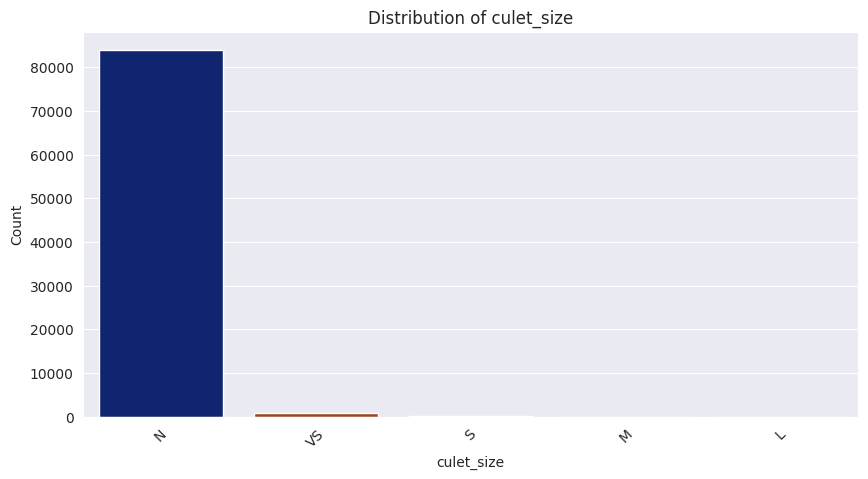

In [134]:
plot_categorical_columns(df,['culet_size'])

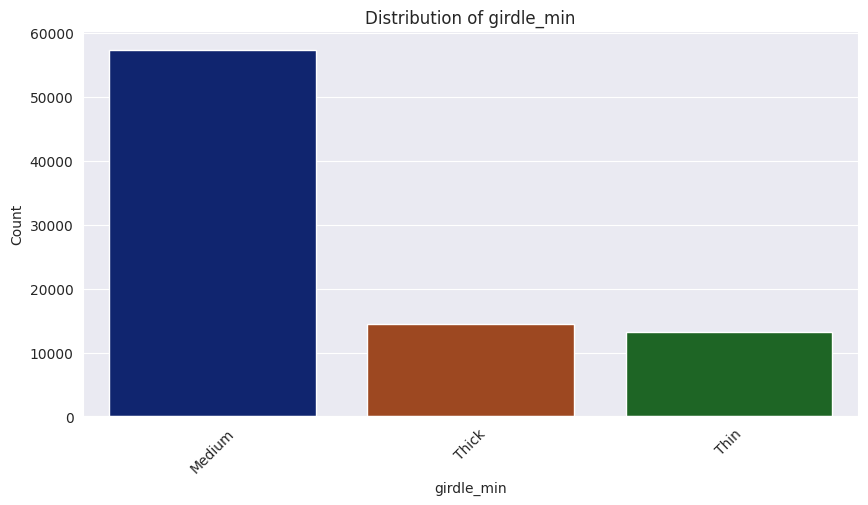

In [135]:
plot_categorical_columns(df,['girdle_min'])

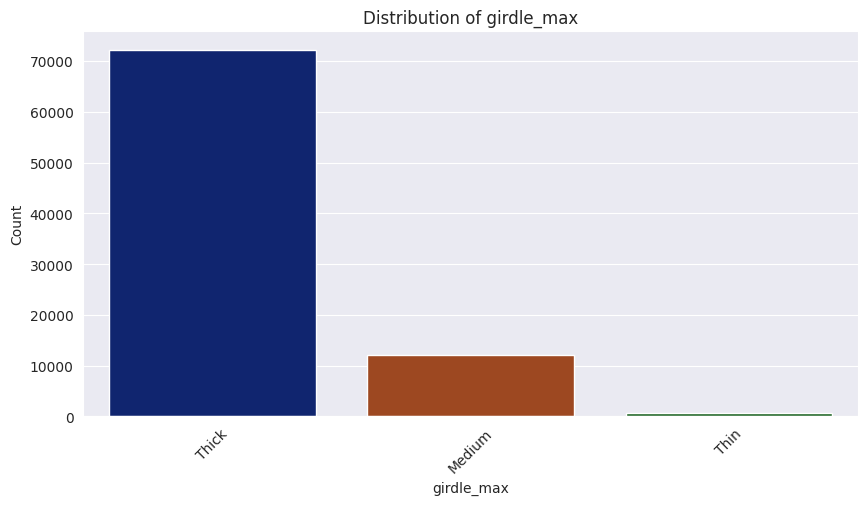

In [136]:
plot_categorical_columns(df,['girdle_max'])

## **DETECTION OF OUTLIERS**

---



In [137]:
x=df.drop('total_sales_price',axis=1)
y=df.total_sales_price

<Axes: >

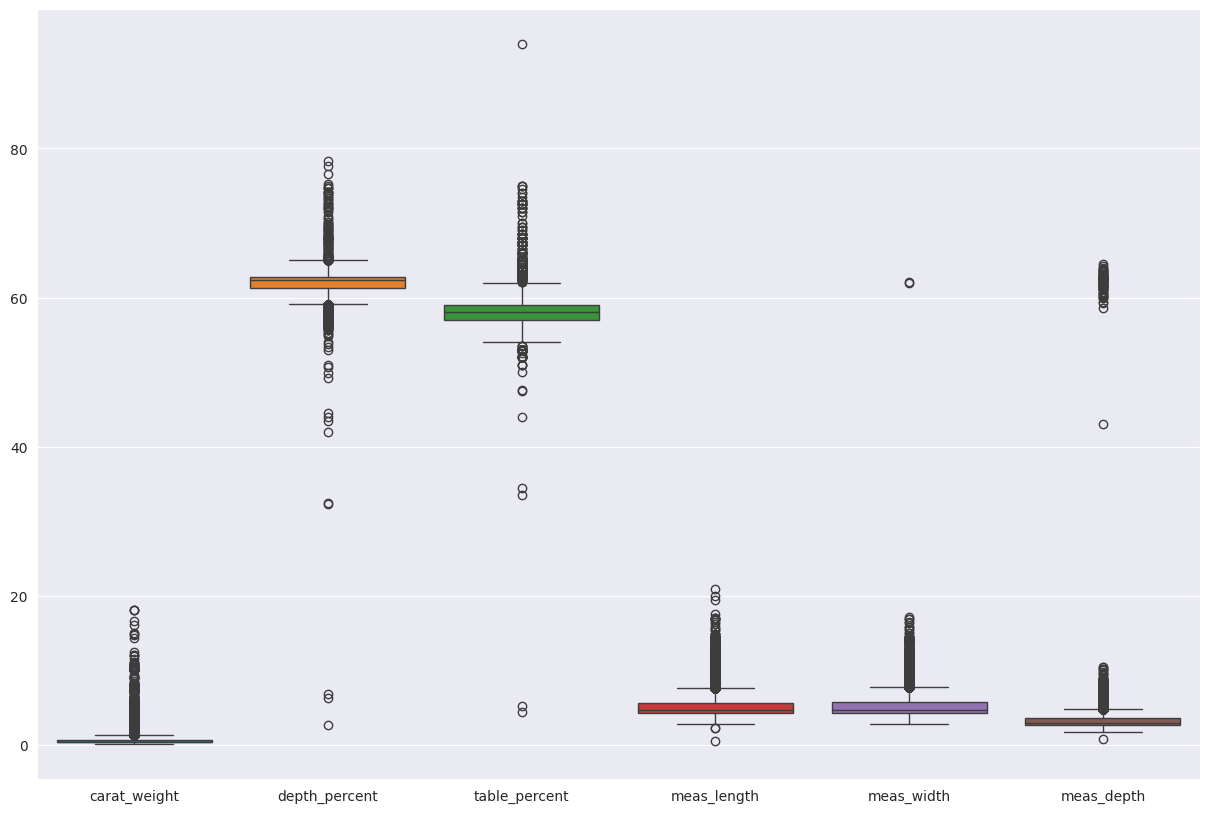

In [138]:
plt.figure(figsize=(15,10))
sns.boxplot(x)

## **LABEL ENCODING**

---



In [139]:
columns=['cut','clarity','cut_quality','symmetry','cut','color','lab','polish','culet_size','girdle_min','girdle_max']
le_dict={}
for col in columns:
  le_dict[col]=LabelEncoder()
  df[col]=le_dict[col].fit_transform(df[col])

## **DATA SPLITTING**

---



In [142]:
x=df.drop('total_sales_price',axis=1)
y=df.total_sales_price

## **FEATURE SELECTION**

---




## **MUTUAL INFORMATION**

Mutual Information (MI) is a measure of the mutual dependence between two variables. In the context of feature selection, mutual information can be used to evaluate the relevance of each feature with respect to the target variable


In [143]:
# Assuming x is your feature matrix and y is your numerical target
mi = mutual_info_regression(x, y)
mi_df = pd.DataFrame({'Feature': x.columns, 'MI Score': mi}).sort_values(by='MI Score', ascending=False)

print(mi_df)

          Feature  MI Score
3    carat_weight  1.438558
12     meas_width  1.268534
11    meas_length  1.247637
13     meas_depth  1.221713
1           color  0.165585
2         clarity  0.103518
9   depth_percent  0.030723
6        symmetry  0.029746
4     cut_quality  0.021439
10  table_percent  0.018425
14     girdle_min  0.014085
5             lab  0.013409
7          polish  0.011382
15     girdle_max  0.005807
0             cut  0.001985
8      culet_size  0.001407


 Drop the last 6 features with the lowest mutual information (MI) scores

In [144]:
df.drop(columns=['cut','lab','polish','culet_size','girdle_min','girdle_max'],inplace=True)

## **HANDLING OUTLIERS**

---



### **INTERQUARTILE RANGE (IQR)**

The interquartile range (IQR) is a measure of statistical dispersion, which is the spread of the data. It is calculated as the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of a dataset. In simpler terms, the IQR represents the range within which the middle 50% of the data lies.The IQR is useful for identifying outliers and understanding the dispersion of data values, as it is less affected by extreme values or outliers compared to the total range of the data.




In [145]:
lst=['carat_weight','depth_percent', 'table_percent','meas_length', 'meas_width','meas_depth']
for i in lst:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df= df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]

In [146]:
lst=['carat_weight','depth_percent','meas_length', 'meas_width','meas_depth']
for i in lst:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df= df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]

In [147]:
lst=['carat_weight','depth_percent']
for i in lst:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df= df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]

In [148]:
Q1 = df['meas_depth'].quantile(0.25)
Q3 = df['meas_depth'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['meas_depth'] >= lower_bound) & (df['meas_depth'] <= upper_bound)]

<Axes: >

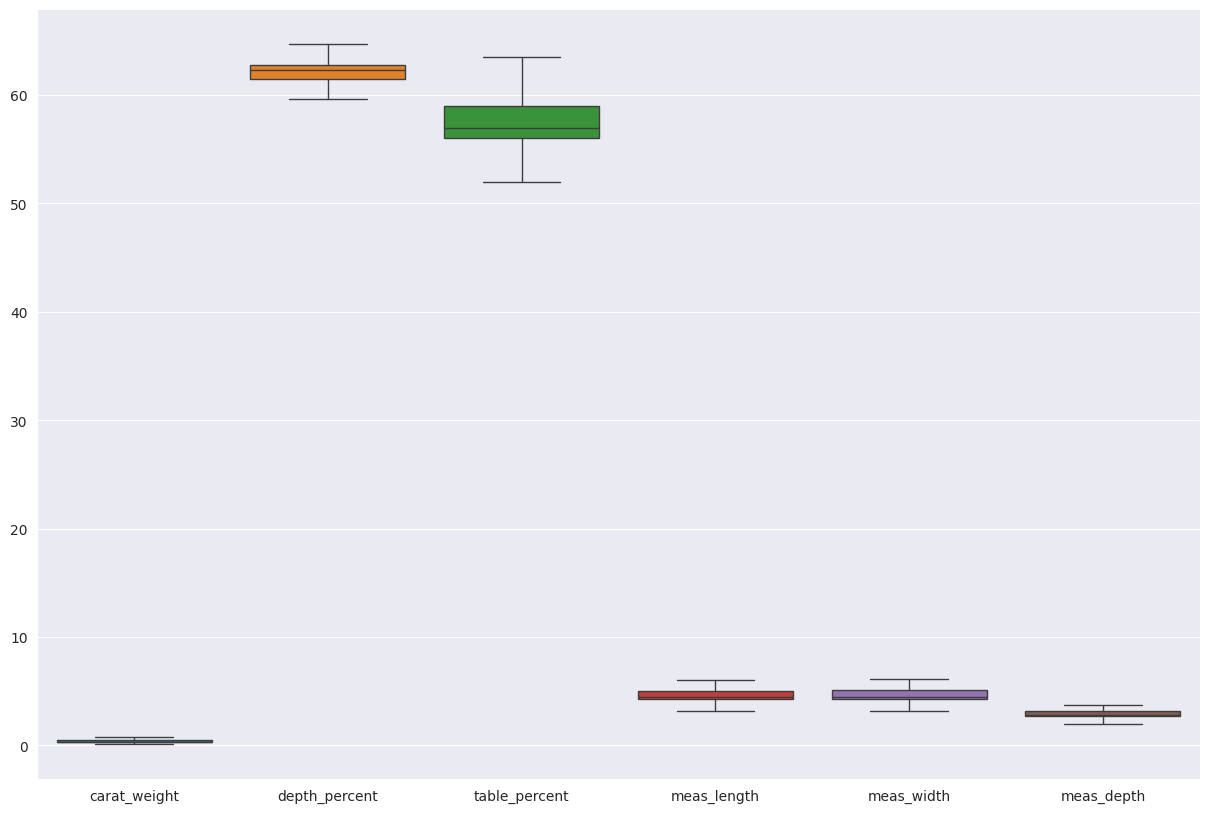

In [149]:
plt.figure(figsize=(15,10))
sns.boxplot(df[['carat_weight','depth_percent', 'table_percent','meas_length', 'meas_width','meas_depth']])

In [150]:
df.shape

(64070, 11)

In [151]:
x1=df.drop('total_sales_price',axis=1)
y1=df.total_sales_price

## **TRAIN TEST SPLIT**

---



In [152]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.3,random_state=42)

## **MODEL CREATION**



In [153]:
lr=LinearRegression()
decision=DecisionTreeRegressor()
lasso=Lasso()
ridge=Ridge()
rf=RandomForestRegressor(random_state=1)
gbr=GradientBoostingRegressor()
xgb=XGBRegressor()
ada=AdaBoostRegressor()

# **MODEL EVALUATION**


---

In [156]:
models=[lr,lasso,ridge,decision,rf,gbr,xgb,ada]
r2_scores = []
for model in models:
  model.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(model)
  print('MAE:',mean_absolute_error(y_test1,y_pred1))
  print('MSE:',mean_squared_error(y_test1,y_pred1))
  print('RMSE:' ,np.sqrt(mean_squared_error(y_test1,y_pred1)))
  print('R2_score:',r2_score(y_test1,y_pred1))
  print('_'*100,'\n')
  r2_scores.append(r2_score(y_test1, y_pred1))


LinearRegression()
MAE: 269.70180244145206
MSE: 152443.02611362204
RMSE: 390.43952939427385
R2_score: 0.8712083384438235
____________________________________________________________________________________________________ 

Lasso()
MAE: 275.63702579566933
MSE: 155176.74748083274
RMSE: 393.9247992711715
R2_score: 0.8688987508812396
____________________________________________________________________________________________________ 

Ridge()
MAE: 270.7597882769122
MSE: 152644.6517201585
RMSE: 390.697647446409
R2_score: 0.8710379948240455
____________________________________________________________________________________________________ 

DecisionTreeRegressor()
MAE: 179.41915959974335
MSE: 81501.81941915382
RMSE: 285.4852350282827
R2_score: 0.9311430964705423
____________________________________________________________________________________________________ 

RandomForestRegressor(random_state=1)
MAE: 137.6291696069107
MSE: 47019.12032350858
RMSE: 216.83892714065107
R2_score: 0.9602758

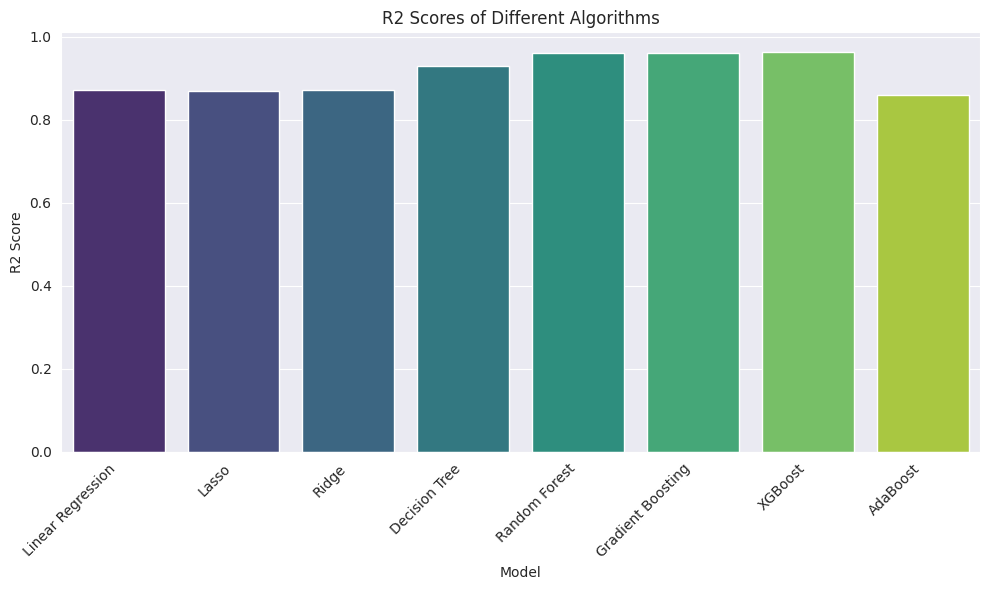

In [164]:
sns.set_style('darkgrid')
model_names = ['Linear Regression', 'Lasso', 'Ridge', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'AdaBoost']
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=r2_scores,palette='viridis')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('R2 Scores of Different Algorithms')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# The XGBRegressor model achieved the highest accuracy of 96.3% among all models evaluated.